In [1]:
import numpy as np
import pandas as pd
import rasterio
import os
from matplotlib import pyplot as plt
from PIL import Image

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from natsort import natsorted
from keras.applications.vgg16 import preprocess_input
np.set_printoptions(threshold=np.inf, linewidth=np.inf)

In [2]:
#input shape 확인
#a=np.array(keras.preprocessing.image.load_img("data1.png", target_size=(28, 28)))
#a.shape

In [3]:
%pwd

'C:\\Users\\ebdl\\산불예측\\Modeling\\Modeling_0423'

In [4]:
path_train="input/train"
path_test="input/real_test"

In [5]:
input_shape=(28,28,3)
batch_size=32
epochs=10

In [6]:
# 전처리 옵션 설정
train_datagen = ImageDataGenerator(rescale = 1./255,validation_split=0.2)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [7]:
# 저장된 이미지 전처리
train_generator = train_datagen.flow_from_directory(path_train, # 디렉토리명  
                                                    target_size = (28, 28), # 이미지 크기 변경
                                                    batch_size = batch_size, # 배치 사이즈 지정
                                                    class_mode = 'binary',# 클래스 모드 지정
                                                    shuffle=True,
                                                    subset='training') # train데이터

valid_generator = train_datagen.flow_from_directory(path_train, # 디렉토리명  
                                                    target_size = (28, 28), # 이미지 크기 변경
                                                    batch_size = batch_size, # 배치 사이즈 지정
                                                    class_mode = 'binary', # 클래스 모드 지정
                                                    shuffle=False,
                                                    subset='validation') # val데이터
test_generator = test_datagen.flow_from_directory(path_test, # 디렉토리명  
                                                    target_size = (28, 28), # 이미지 크기 변경
                                                    batch_size = batch_size, # 배치 사이즈 지정
                                                    shuffle=False,
                                                    class_mode = 'binary',
                                                    classes=['.']) # 클래스 모드 지정

Found 1406 images belonging to 2 classes.
Found 350 images belonging to 2 classes.
Found 2223 images belonging to 1 classes.


In [8]:
#모델정의
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [9]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [10]:
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // batch_size,
    epochs=epochs
)

Epoch 1/10
43/43 [==============================] - 26s 530ms/step - loss: 0.5937 - accuracy: 0.6936 - val_loss: 0.5708 - val_accuracy: 0.7031
Epoch 2/10
43/43 [==============================] - 23s 526ms/step - loss: 0.5409 - accuracy: 0.7125 - val_loss: 0.5245 - val_accuracy: 0.7375
Epoch 3/10
43/43 [==============================] - 23s 528ms/step - loss: 0.5253 - accuracy: 0.7322 - val_loss: 0.5507 - val_accuracy: 0.7469
Epoch 4/10
43/43 [==============================] - 23s 526ms/step - loss: 0.5218 - accuracy: 0.7344 - val_loss: 0.5173 - val_accuracy: 0.7500
Epoch 5/10
43/43 [==============================] - 23s 526ms/step - loss: 0.5135 - accuracy: 0.7365 - val_loss: 0.4974 - val_accuracy: 0.7625
Epoch 6/10
43/43 [==============================] - 22s 524ms/step - loss: 0.5093 - accuracy: 0.7394 - val_loss: 0.5052 - val_accuracy: 0.7406
Epoch 7/10
43/43 [==============================] - 23s 528ms/step - loss: 0.4964 - accuracy: 0.7460 - val_loss: 0.5410 - val_accuracy: 0.7437

In [11]:
loss, accuracy = model.evaluate(valid_generator)
print(f'Val loss: {loss}')
print(f'Val accuracy: {accuracy}')

11/11 [==============================] - 5s 422ms/step - loss: 0.4875 - accuracy: 0.7714
Val loss: 0.4874928891658783
Val accuracy: 0.7714285850524902


In [12]:
result=model.predict(test_generator)

70/70 [==============================] - 23s 333ms/step


In [13]:
#산불이 난다고 예측한것들
result[result>=0.5]

array([0.5592744 , 0.58956313], dtype=float32)

In [14]:
result

array([[3.48036992e-03],
       [3.48036992e-03],
       [3.48036992e-03],
       [3.48036992e-03],
       [3.48036992e-03],
       [3.48036992e-03],
       [3.48036992e-03],
       [3.48036992e-03],
       [3.48036992e-03],
       [3.48036992e-03],
       [3.48036992e-03],
       [3.48036992e-03],
       [3.48036992e-03],
       [3.48036992e-03],
       [3.48036992e-03],
       [3.48036992e-03],
       [3.48036992e-03],
       [3.48036992e-03],
       [3.48036992e-03],
       [3.48036992e-03],
       [3.48036992e-03],
       [3.48036992e-03],
       [3.48036992e-03],
       [3.48036992e-03],
       [3.48036992e-03],
       [3.48036992e-03],
       [3.48036992e-03],
       [3.48036992e-03],
       [3.48036992e-03],
       [3.48036992e-03],
       [4.47045686e-03],
       [2.60947227e-01],
       [1.82870552e-01],
       [3.48036992e-03],
       [3.48036992e-03],
       [3.48036992e-03],
       [3.48036992e-03],
       [3.48036992e-03],
       [3.48036992e-03],
       [3.48036992e-03],


In [15]:
len(result)

2223

## 결과맵 생성

In [16]:
result[1]

array([0.00348037], dtype=float32)

In [17]:
result[1000]

array([0.21587124], dtype=float32)

In [19]:
list_show=[]
list_col=[]
x=0
for i in range(39):
    list_col=[]
    for j in range(57):
        list_col.append(result[x])
        x+=1
    list_show.append(list_col)

In [20]:
len(list_show[0])

57

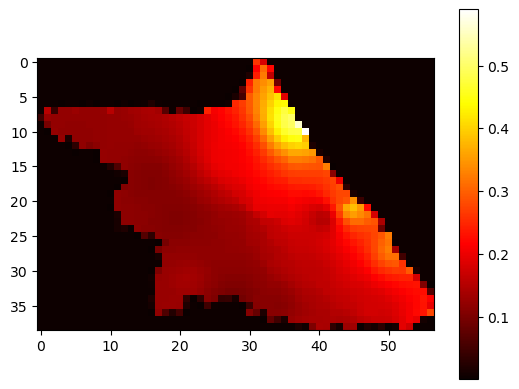

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# 임의의 5x5 배열 생성
arr = list_show

# heatmap 플롯 생성
plt.imshow(arr, cmap='hot')

# 컬러바 추가
plt.colorbar()

# 플롯 출력
plt.show()

In [26]:
len(result)

2223

In [28]:
import numpy as np

# 400x278 크기의 빈 2D 배열 생성
result_arr = np.zeros((278, 400))

x=0

# (3,3)부터 시작하여 7씩 증가하는 인덱스 위치에 값을 채워 넣음
for i in range(3, 276, 7):
    for j in range(3, 400, 7):
        value = result[x]
        result_arr[i, j] = value # 결과 배열에 값 추가
        x=x+1

# 결과 배열 출력
print(result_arr)


[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

In [29]:
result_arr.shape

(278, 400)

In [30]:
len(result_arr[1])

400

In [31]:
result_arr[3,10]

0.0034803699236363173

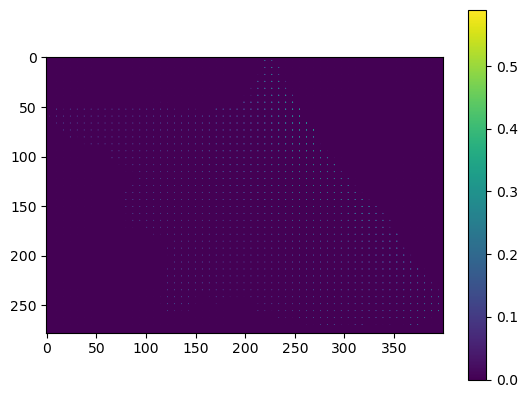

In [32]:
import matplotlib.pyplot as plt

# heatmap 시각화
plt.imshow(result_arr)
plt.colorbar()
plt.show()


- 추후 보간 필요

- 실제로 진행할때는 보간하지 않고 전 지점에 대해 모델적용